# import lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading the dataset

In [2]:
df = pd.read_csv('Boston Dataset.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


# preproccesing data

In [6]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

# Exploratory data analysis

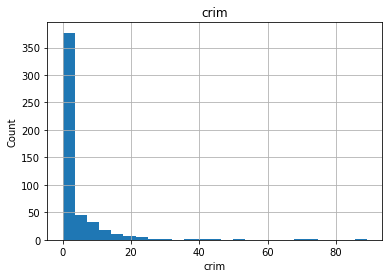

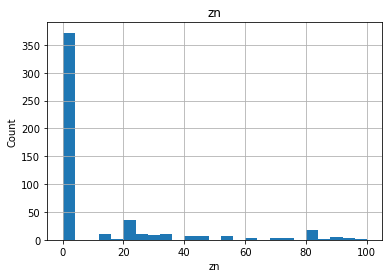

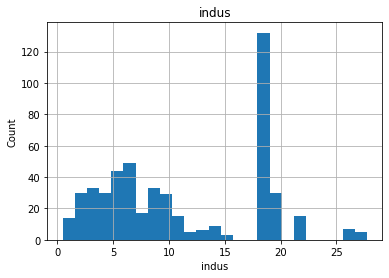

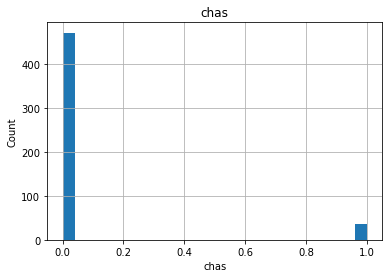

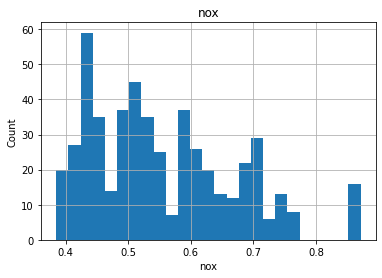

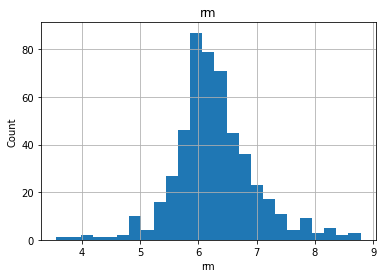

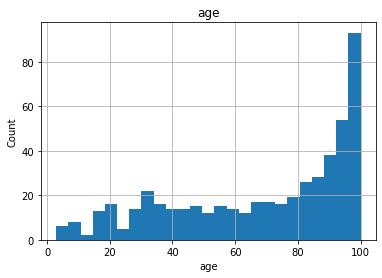

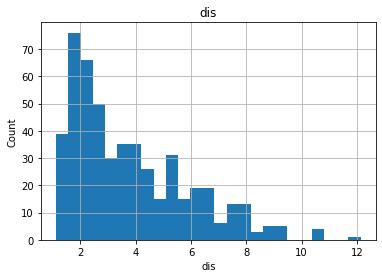

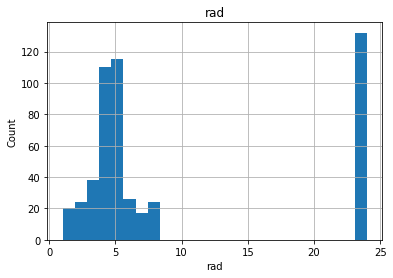

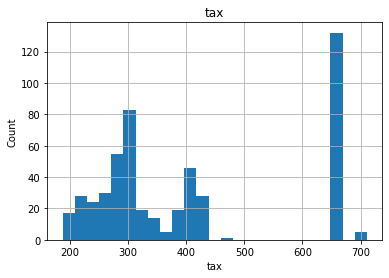

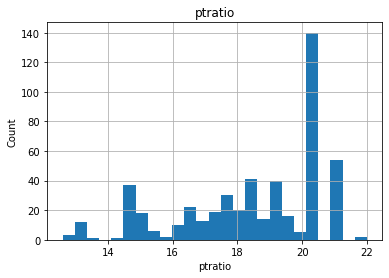

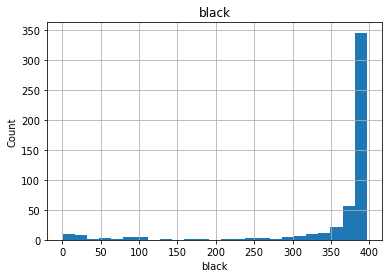

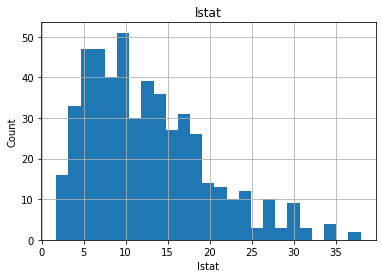

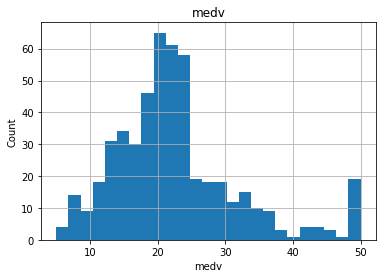

In [7]:
for feature in df.columns:
    data_continous = df.copy()
    data_continous[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

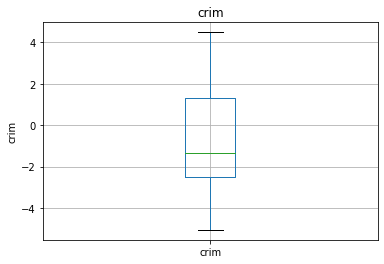

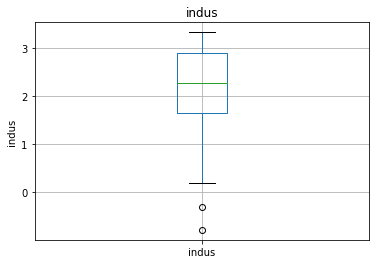

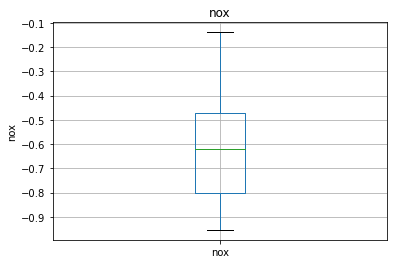

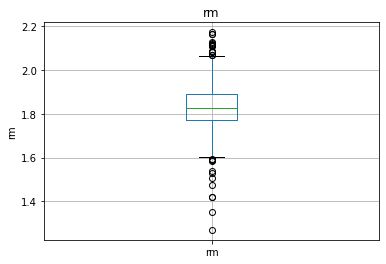

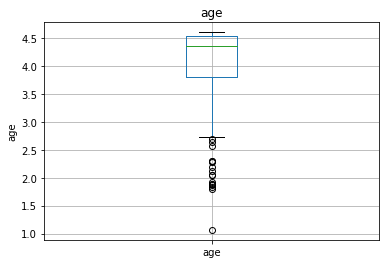

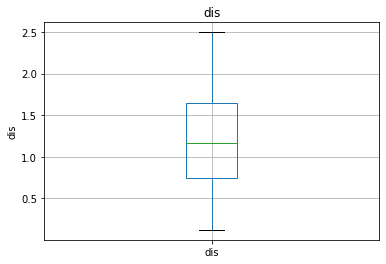

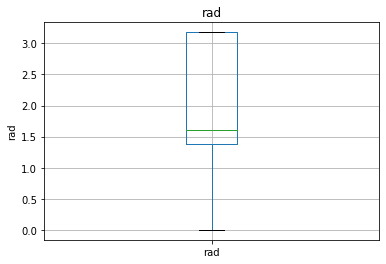

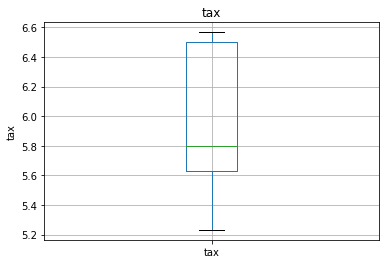

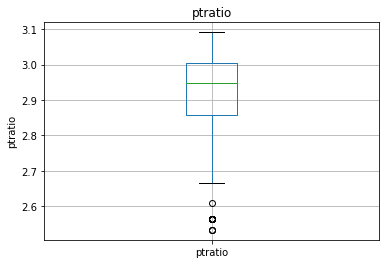

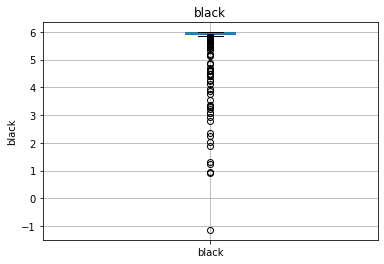

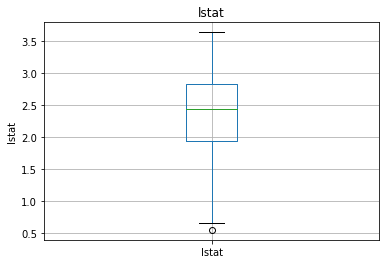

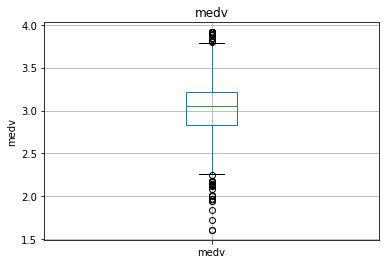

In [8]:
# check the Outliers
for feature in df.columns:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [9]:
cols = ['crim','zn','tax','black']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[cols])
# for col in cols:
#     minimum = min(df[col])
#     maximum = max(df[col])
#     df[col] = (df[col] - minimum)/(maximum- minimum)

/home/shubham/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
scaled = pd.concat([pd.DataFrame(scaler.transform(df[cols]),columns=cols)],axis=1)

In [11]:
for col in cols:
    df[col] = scaled[col]

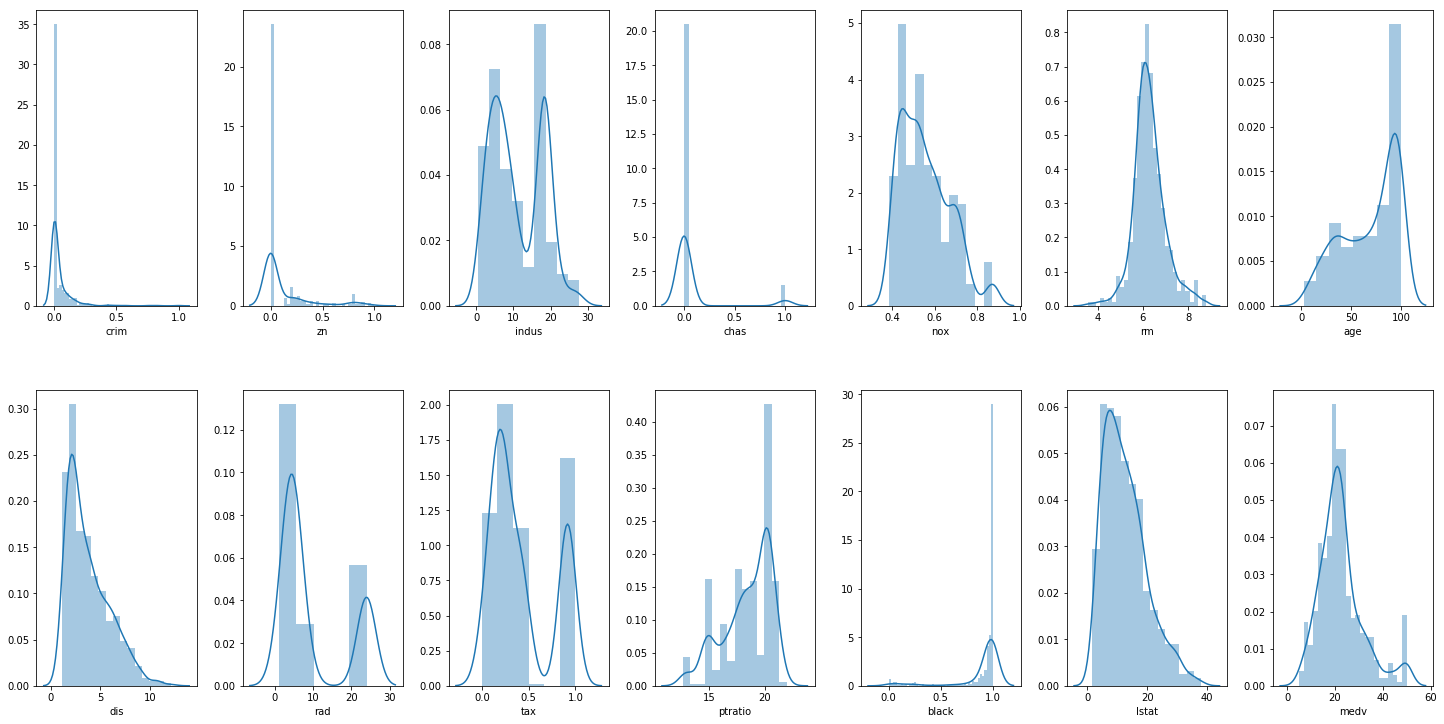

In [12]:
fig, ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()

for col,value in df.items():
    sns.distplot(value,ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)    

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
scaled_cols = scaler.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols,columns=cols)
scaled_cols.head()

,crim,zn,tax,black
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [15]:
for col in cols:
    df[col] = scaled_cols[col]

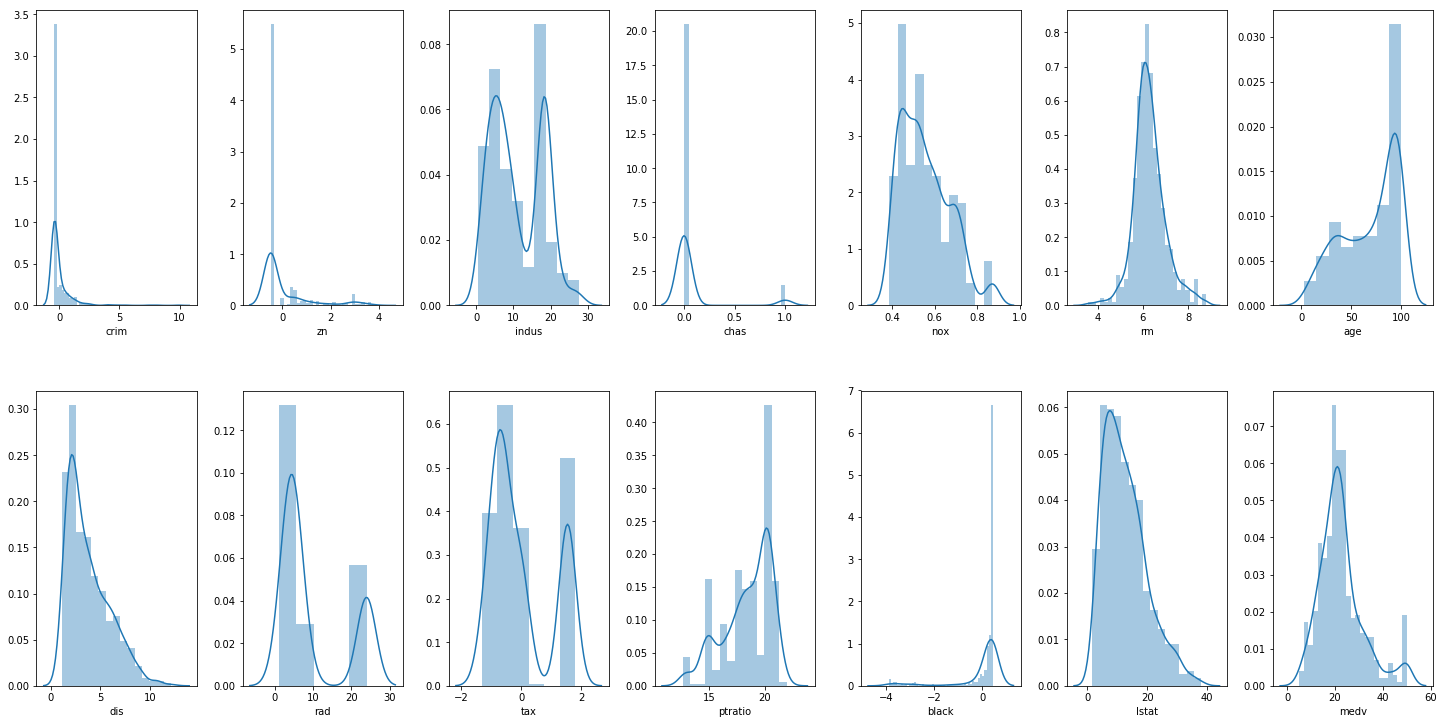

In [16]:
fig, ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()

for col,value in df.items():
    sns.distplot(value,ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)  

# correlation

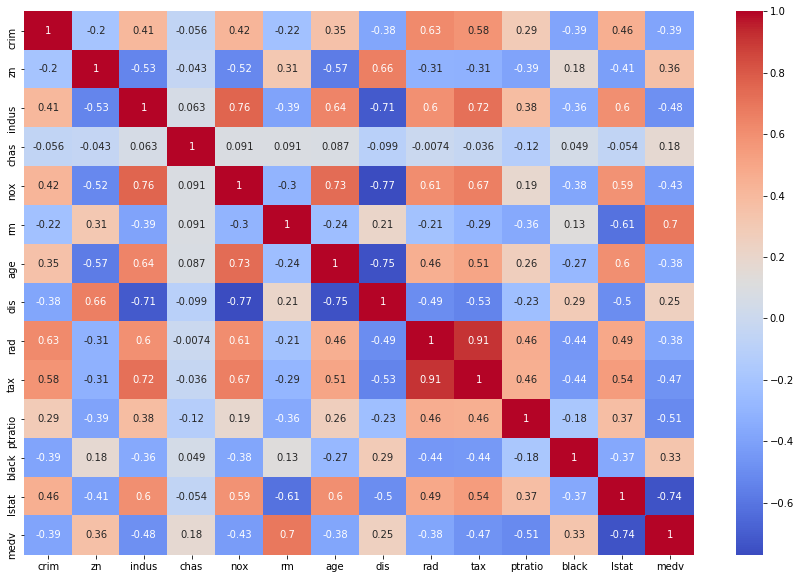

In [17]:
cor = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')

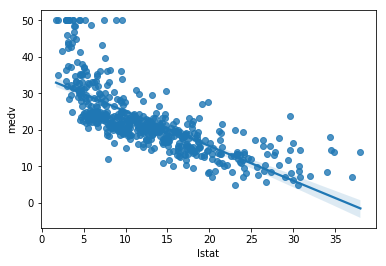

In [18]:
sns.regplot(x=df['lstat'],y=df['medv'])

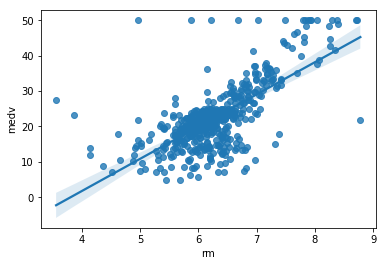

In [19]:
sns.regplot(x=df['rm'],y=df['medv'])

In [26]:
X = df.drop(['medv'],axis=1)
y = df['medv']

In [29]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error

def model_train(model,X,y):
#     train the model
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
    model.fit(X_train,y_train)
    
#     predict the training set
    pred = model.predict(X_test)
    
#     performed cross validation
    cv_score = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE :",mean_squared_error(y_test,pred))
    print("CV score: ",cv_score)


Model Report
('MSE :', 22.09869482709799)
('CV score: ', 37.13180746769892)


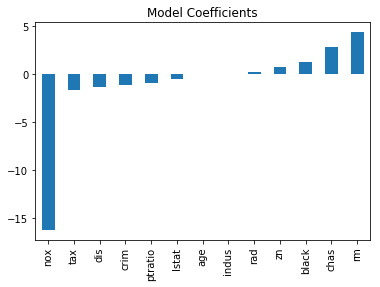

In [31]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression(normalize=True)
model_train(model,X,y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

Model Report
('MSE :', 22.48588287631101)
('CV score: ', 35.25722551649436)


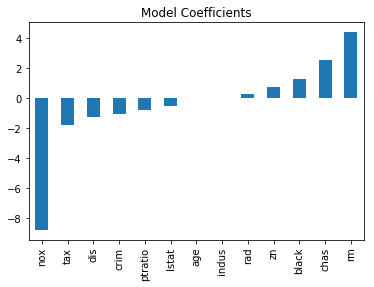

In [32]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = Ridge()
model_train(model,X,y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

Model Report
('MSE :', 25.482222484839188)
('CV score: ', 38.68576889973283)


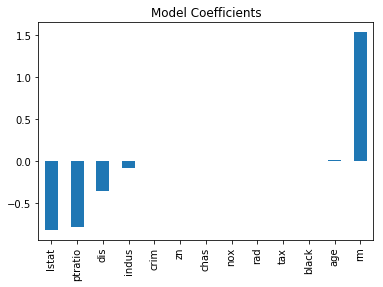

In [33]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = Lasso()
model_train(model,X,y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

Model Report
('MSE :', 8.953903937007876)
('CV score: ', 21.889929060376627)


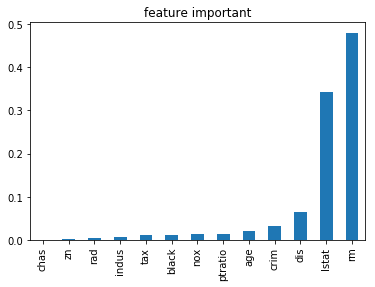

In [36]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model_train(model,X,y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values()
coef.plot(kind='bar',title="feature important")

Model Report
('MSE :', 22.734488188976375)
('CV score: ', 49.57469345758104)


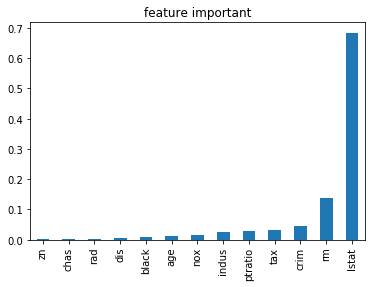

In [37]:
from sklearn.tree import ExtraTreeRegressor
model = ExtraTreeRegressor()
model_train(model,X,y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values()
coef.plot(kind='bar',title="feature important")